In [1]:
# 运行文件test_gpy.py,查看GPU的配置信息
!python test_gpu.py

Support CUDA ?:  True
tensor([10.], device='cuda:0')
tensor([[-0.5269,  0.7163,  2.1319],
        [ 0.5086, -0.5636,  0.3893]], device='cuda:0')
tensor([[ 9.4731, 10.7163, 12.1319],
        [10.5086,  9.4364, 10.3893]], device='cuda:0')
Support cudnn ?:  True


<h3>2.4 Numpy与Tensor</h3>

2.4.1 torch概述

In [2]:
import torch

x = torch.tensor([1,2])
y = torch.tensor([3,4])
# 不修改自身数据
z = x.add(y)
print(z)
print(x)
# 修改自身数据
x.add_(y)
print(x)

tensor([4, 6])
tensor([1, 2])
tensor([4, 6])


2.4.2 创建tensor

In [3]:
import torch

# 根据list数据生成tensor
torch.Tensor([1,2,3,4,5,6])
# 根据指定形状生成tensor
torch.Tensor(2,3)
# 根据给定的tensor的形状
t=torch.Tensor([[1,2,3],[4,5,6]])
# 查看tensor的形状
print(t.size())
# shape与size()等价方式
print(t.shape)
# 根据已有形状创建tensor
print(torch.Tensor(t.size()))

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [4]:
# torch.tensor与torch.Tensor的区别
import torch
t1 = torch.Tensor(1)
t2 = torch.tensor(1)
print("t1的值{},t1的数据类型{}".format(t1,t1.type()))
print("t2的值{},t2的数据类型{}".format(t2,t2.type()))

t1的值tensor([-3.6592e-33]),t1的数据类型torch.FloatTensor
t2的值1,t2的数据类型torch.LongTensor


In [5]:
#根据一定规则，自动生成tensor的一些例子
import torch

# 生成一个单位矩阵
print(torch.eye(2,2))
# 自动生成全是0的矩阵
print(torch.zeros(2,3))
# 根据规则生成数据
print(torch.linspace(1,10,4))
# 生成满足均匀分布随机数
print(torch.rand(2,3))
# 生成满足标准分布随机数
print(torch.randn(2,3))
# 返回所给数据形状相同，值全为0的张量
print(torch.zeros_like(torch.rand(2,3)))

tensor([[1., 0.],
        [0., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([ 1.,  4.,  7., 10.])
tensor([[0.6888, 0.9530, 0.2097],
        [0.9579, 0.6931, 0.9474]])
tensor([[-0.3344,  0.9152, -1.9058],
        [ 1.4735,  1.0585, -0.4855]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


2.4.3 修改tensor的形状

In [6]:
import torch

# 生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
# 查看矩阵的形状
x.size()   # 结果为torch.Size([2, 3])

# 查看x的维度
x.dim()    # 结果为2
# 把x变为3x2的矩阵
x.view(3,2)
# 把x展平为1维向量
y = x.view(-1)
print(y.shape)
# 添加一个维度
z = torch.unsqueeze(y,0)
# 查看z的形状
z.size()   # 结果为torch.Size([1, 6])
# 计算Z的元素个数
z.numel()   # 结果为6

torch.Size([6])


6

2.4.4 索引操作

In [7]:
import torch

# 设置一个随机种子
torch.manual_seed(100) 
# 生成一个形状为2x3的矩阵
x = torch.randn(2, 3)
print(x)
# 根据索引获取第1行，所有数据
print(x[0,:])
# 获取最后一列数据
print(x[:,-1])
# 生成是否大于0的Byter张量
mask = x>0
print(mask)
# 获取大于0的值
print(torch.masked_select(x,mask))
# 获取非0下标,即行，列索引
print(torch.nonzero(mask))
# 获取指定索引对应的值,输出根据以下规则得到
# out[i][j] = input[index[i][j]][j]  # if dim == 0
# out[i][j] = input[i][index[i][j]]  # if dim == 1
index = torch.LongTensor([[0,1,1]])
torch.gather(x,0,index)
index = torch.LongTensor([[0,1,1],[1,1,1]])
a = torch.gather(x,1,index)
# 把a的值返回到一个2x3的0矩阵中
z = torch.zeros(2,3)
z.scatter_(1,index,a)

tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134]])
tensor([ 0.3607, -0.2859, -0.3938])
tensor([-0.3938, -2.3134])
tensor([[ True, False, False],
        [ True, False, False]])
tensor([0.3607, 0.2429])
tensor([[0, 0],
        [1, 0]])


tensor([[ 0.3607, -0.2859,  0.0000],
        [ 0.0000, -1.3833,  0.0000]])

2.4.5 广播机制

In [8]:
import torch
import numpy as np

A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
# 把ndarray转换为Tensor
A1 = torch.from_numpy(A)  #形状为4x1
B1 = torch.from_numpy(B)  #形状为3
# Tensor自动实现广播
C = A1+B1
# 我们可以根据广播机制，手工进行配置
# 根据规则1，B1需要向A1看齐，把B变为（1,3）
B2 = B1.unsqueeze(0)  #B2的形状为1x3
# 使用expand函数重复数组，分别的4x3的矩阵
A2 = A1.expand(4,3)
B3 = B2.expand(4,3)
# 然后进行相加,C1与C结果一致
C1 = A2+B3
print(C1)

tensor([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]], dtype=torch.int32)


2.4.6 遂元操作

In [9]:
import torch

t = torch.randn(1, 3)
t1 = torch.randn(3, 1)
t2 = torch.randn(1, 3)
# t+0.1*(t1/t2)
torch.addcdiv(t, 0.1, t1, t2)
# 计算sigmoid
torch.sigmoid(t)
# 将t限制在[0,1]之间
torch.clamp(t,0,1)
# t+2进行就地运算
t.add_(2)

C:\Users\Zongzc\AppData\Local\Temp/ipykernel_11624/3246844734.py:7: UserWarning: This overload of addcdiv is deprecated:
	addcdiv(Tensor input, Number value, Tensor tensor1, Tensor tensor2, *, Tensor out)
Consider using one of the following signatures instead:
	addcdiv(Tensor input, Tensor tensor1, Tensor tensor2, *, Number value, Tensor out) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1005.)
  torch.addcdiv(t, 0.1, t1, t2)


tensor([[1.6828, 1.1340, 3.7482]])

2.4.7 归并操作

In [10]:
import torch

# 生成一个含6个数的向量
a = torch.linspace(0,10,6)
# 使用view方法，把a变为2x3矩阵
a = a.view((2,3))
# 沿y轴方向累加，即dim=0
b = a.sum(dim=0)   #b的形状为[3]
# 沿y轴方向累加，即dim=0,并保留含1的维度
b = a.sum(dim=0,keepdim=True) #b的形状为[1,3]

2.4.8 比较操作

In [11]:
import torch

x = torch.linspace(0,10,6).view(2,3)
# 求所有元素的最大值
torch.max(x)   # 结果为10
# 求y轴方向的最大值
torch.max(x,dim=0)  # 结果为[6,8,10]
# 求最大的2个元素
torch.topk(x,1,dim=0)  # 结果为[6,8,10],对应索引为tensor([[1, 1, 1]

torch.return_types.topk(
values=tensor([[ 6.,  8., 10.]]),
indices=tensor([[1, 1, 1]]))

2.4.9 矩阵操作

In [12]:
import torch

a = torch.tensor([2, 3])
b = torch.tensor([3, 4])

torch.dot(a,b)  #运行结果为18
x = torch.randint(10,(2,3))
y = torch.randint(6,(3,4))
torch.mm(x,y)
x = torch.randint(10,(2,2,3))
y = torch.randint(6,(2,3,4))
torch.bmm(x,y)

tensor([[[28, 77, 30, 27],
         [24, 73, 25, 21]],

        [[15, 68, 57,  6],
         [25, 39, 43, 10]]])

<h3>2.5 Tensor与Autograd</h3>

2.5.3 标量反向传播

In [13]:
import torch
import numpy as np

# 定义输入张量x
x = torch.Tensor([2])
# 初始化权重参数W,偏移量b、并设置require_grad为True，为自动求导
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
# 实现前向传播
y = torch.mul(w,x)  # 等价于w*x
z = torch.add(y,b)  # 等价于y+b
# 查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))
# 查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
# 因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
# 查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
# x，w，b，y，z的是否为叶子节点：True,True,True,False,False
# 查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
# 因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
# 查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))
# y，z的是否为叶子节点：<MulBackward0 object at 0x7f923e85dda0>,<AddBackward0 object at 0x7f923e85d9b0>

x,w,b的require_grad属性分别为：False,True,True
y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x000002E311E834F0>,<AddBackward0 object at 0x000002E311E83550>


In [14]:
# 基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
# 如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
# z.backward(retain_graph=True)
z.backward()
# 查看叶子节点的梯度，x是叶子节点但它无需求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
# 参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None

# 非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
# 非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


C:\Users\Zongzc\AppData\Local\Temp/ipykernel_11624/2380314713.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))


2.5.4 非标量反向传播

In [15]:
# backward函数的格式为：
# backward(gradient=None, retain_graph=None, create_graph=False)

In [16]:
import torch

# 定义叶子节点张量x，形状为1x2
x = torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)
# 初始化Jacobian矩阵
J = torch.zeros(2 ,2)
# 初始化目标张量，形状为1x2
y = torch.zeros(1, 2)
# 定义y与x之间的映射关系：
# y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]

In [17]:
# y.backward(torch.Tensor([[1, 1]]))
# print(x.grad)

In [18]:
# 生成y1对x的梯度
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
# 梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
# 生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))
J[1]=x.grad
# 显示jacobian矩阵的值
print(J)

tensor([[4., 3.],
        [2., 6.]])


<h3>2.6 使用Numpy实现机器学习</h3>

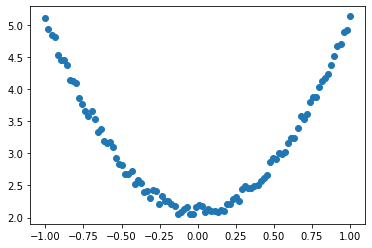

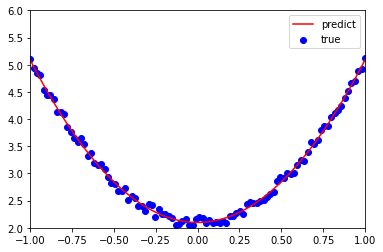

[[2.98927619]] [[2.09818307]]


In [19]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  

# 画图
plt.scatter(x, y)
plt.show()

# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 

lr =0.001 # 学习率

for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b

plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)

<h3>2.7 使用Tensor及antograd实现机器学习</h3>

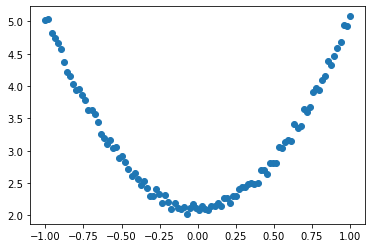

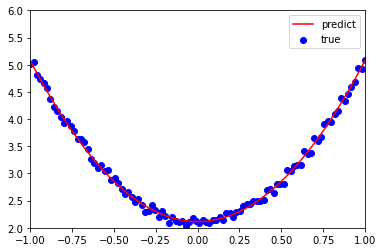

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [20]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

t.manual_seed(100) 
dtype = t.float
# 生成x坐标数据，x为tenor，形状为100x1
x = t.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
# 生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*torch.rand(x.size())                 

# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()

# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True) 

lr =0.001 # 学习率

for ii in range(800):
    # forward：计算loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # backward：自动计算梯度
    loss.backward()
    
    # 手动更新参数，需要用torch.no_grad()更新参数
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
        
print(w, b)


<h3>2.8 使用TensorFlow架构</h3>

Instructions for updating:
non-resource variables are not supported in the long term
损失值、权重、偏移量分别为9.0313,[0.6130155],[0.05828922]
损失值、权重、偏移量分别为0.1032,[1.9542725],[2.4509606]
损失值、权重、偏移量分别为0.0546,[2.2519872],[2.3710263]
损失值、权重、偏移量分别为0.0299,[2.4592538],[2.294553]
损失值、权重、偏移量分别为0.0171,[2.6083646],[2.239311]
损失值、权重、偏移量分别为0.0105,[2.7156892],[2.199547]
损失值、权重、偏移量分别为0.0070,[2.792936],[2.170927]
损失值、权重、偏移量分别为0.0053,[2.8485372],[2.150327]
损失值、权重、偏移量分别为0.0043,[2.8885558],[2.1355]
损失值、权重、偏移量分别为0.0039,[2.9173603],[2.124828]


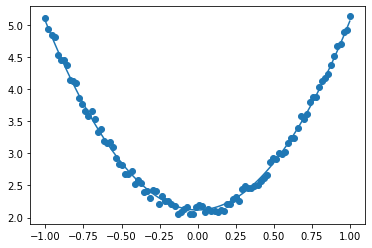

In [21]:
# -*- coding: utf-8 -*-
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

# 生成训练数据
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  


# 创建两个占位符，分别用来存放输入数据x和目标值y
# 运行计算图时，导入数据.
x1 = tf.placeholder(tf.float32, shape=(None, 1))
y1 = tf.placeholder(tf.float32, shape=(None, 1))

# 创建权重变量w和b，并用随机值初始化.
# TensorFlow 的变量在整个计算图保存其值.
w = tf.Variable(tf.random_uniform([1], 0, 1.0))
b = tf.Variable(tf.zeros([1]))


# 前向传播，计算预测值.
y_pred = np.power(x,2)*w + b

# 计算损失值
loss=tf.reduce_mean(tf.square(y-y_pred)) 

# 计算有关参数w、b关于损失函数的梯度.
grad_w, grad_b = tf.gradients(loss, [w, b])

# 用梯度下降法更新参数.
# 执行计算图时给 new_w1 和new_w2 赋值
# 对TensorFlow 来说，更新参数是计算图的一部分内容
# 而PyTorch，这部分是属于计算图之外.
learning_rate = 0.01
new_w = w.assign(w - learning_rate * grad_w)
new_b = b.assign(b - learning_rate * grad_b)

# 已构建计算图, 接下来创建TensorFlow session，准备执行计算图.
with tf.Session() as sess:
    # 执行之前需要初始化变量w、b
    sess.run(tf.global_variables_initializer())


    for step in range(2000):
        # 循环执行计算图. 每次需要把x1,y1赋给x和y.
        # 每次执行计算图时，需要计算关于new_w和new_b的损失值,
        # 返回numpy多维数组
        loss_value, v_w, v_b = sess.run([loss, new_w, new_b],
                                    feed_dict={x1: x, y1: y})
        if  step%200==0:  #每200次打印一次训练结果
            print("损失值、权重、偏移量分别为{:.4f},{},{}".format(loss_value,v_w,v_b))
# 可视化结果            
plt.figure() 
plt.scatter(x,y)
plt.plot (x, v_b + v_w*x**2)
